In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install tensorflow transformers shap xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.2
    Uninstalling xgboost-2.0.2:
      Successfully uninstalled xgboost-2.0.2


In [ ]:
# import pandas as pd
# import tensorflow as tf
# import xgboost as xgb
# from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
# from sklearn.metrics import mean_absolute_error
# import shap
# from xgboost.callback import EarlyStopping  # Import XGBoost-specific callback
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Load data and create features
# df = pd.read_csv('/content/drive/MyDrive/CUNY/Capstone/Data/temp/tage_df.csv')
# # One-hot encode the 'category_tags' column
# df_onehot = pd.get_dummies(df, columns=['category_tags'], drop_first=True)

# # Split data into features (X) and target (y)
# X = df_onehot.drop("Change_abs", axis=1)
# y = df_onehot["Change_abs"]
# y = np.log1p(y)  # Log transformation

# # Visualize data and target distributions
# import matplotlib.pyplot as plt
# y.hist(figsize=(10, 8))  # Histograms for features
# plt.show()



# Observation Data Distribution

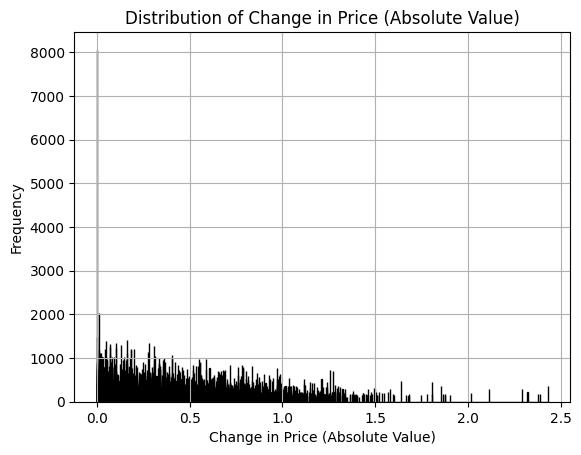

count    677783.000000
mean          0.432192
std           0.353639
min           0.000000
25%           0.154708
50%           0.355540
75%           0.632181
max           2.431548
Name: Change_abs, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Load data and create features
df = pd.read_csv('/content/drive/MyDrive/CUNY/Capstone/Data/temp/tage_df.csv')
# One-hot encode the 'category_tags' column
df_onehot = pd.get_dummies(df, columns=['category_tags'], drop_first=True)

# Split data into features (X) and target (y)
X = df_onehot.drop("Change_abs", axis=1)
y = df_onehot["Change_abs"]
y = np.log1p(y)  # Log transformation

# Convert X to a sparse matrix
X_sparse = csr_matrix(X)

# Standardization of features (compatible with sparse matrices)
scaler = StandardScaler(with_mean=False)  # Exclude mean centering for sparse data
X_scaled = scaler.fit_transform(X_sparse)


import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of Change_abs
plt.hist(y, bins=10000, edgecolor="black")
plt.xlabel("Change in Price (Absolute Value)")
plt.ylabel("Frequency")
plt.title("Distribution of Change in Price (Absolute Value)")
plt.grid(True)
plt.show()

# Calculate descriptive statistics for further insights
print(y.describe())


# RandomizedSearchCV with XGB

TPU is activated.
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END alpha=0.1, colsample_bytree=0.8, eta=0.1, gamma=2, lambda=10, max_depth=7, min_child_weight=7, n_estimators=50, subsample=2.0, tree_method=auto;, score=nan total time=   0.2s
[CV 2/10] END alpha=0.1, colsample_bytree=0.8, eta=0.1, gamma=2, lambda=10, max_depth=7, min_child_weight=7, n_estimators=50, subsample=2.0, tree_method=auto;, score=nan total time=   0.2s
[CV 3/10] END alpha=0.1, colsample_bytree=0.8, eta=0.1, gamma=2, lambda=10, max_depth=7, min_child_weight=7, n_estimators=50, subsample=2.0, tree_method=auto;, score=nan total time=   0.2s
[CV 4/10] END alpha=0.1, colsample_bytree=0.8, eta=0.1, gamma=2, lambda=10, max_depth=7, min_child_weight=7, n_estimators=50, subsample=2.0, tree_method=auto;, score=nan total time=   0.1s
[CV 5/10] END alpha=0.1, colsample_bytree=0.8, eta=0.1, gamma=2, lambda=10, max_depth=7, min_child_weight=7, n_estimators=50, subsample=2.0, tree_method=auto;, sco


60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1090, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/training.py", line 18

[0]	validation_0-mae:0.27841
[1]	validation_0-mae:0.27833
[2]	validation_0-mae:0.27826


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-mae:0.27819
[4]	validation_0-mae:0.27814
[5]	validation_0-mae:0.27809
[6]	validation_0-mae:0.27804
[7]	validation_0-mae:0.27801
[8]	validation_0-mae:0.27798
[9]	validation_0-mae:0.27794
[10]	validation_0-mae:0.27791
[11]	validation_0-mae:0.27786
[12]	validation_0-mae:0.27784
[13]	validation_0-mae:0.27781
[14]	validation_0-mae:0.27778
[15]	validation_0-mae:0.27776
[16]	validation_0-mae:0.27774
[17]	validation_0-mae:0.27773
[18]	validation_0-mae:0.27771
[19]	validation_0-mae:0.27768
[20]	validation_0-mae:0.27766
[21]	validation_0-mae:0.27765
[22]	validation_0-mae:0.27763
[23]	validation_0-mae:0.27762
[24]	validation_0-mae:0.27760
[25]	validation_0-mae:0.27759
[26]	validation_0-mae:0.27757
[27]	validation_0-mae:0.27756
[28]	validation_0-mae:0.27754
[29]	validation_0-mae:0.27753
[30]	validation_0-mae:0.27750
[31]	validation_0-mae:0.27748
[32]	validation_0-mae:0.27748
[33]	validation_0-mae:0.27746
[34]	validation_0-mae:0.27744
[35]	validation_0-mae:0.27743
[36]	validation_0

[03:57:06] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Glyph 9 (	) missing from current font.


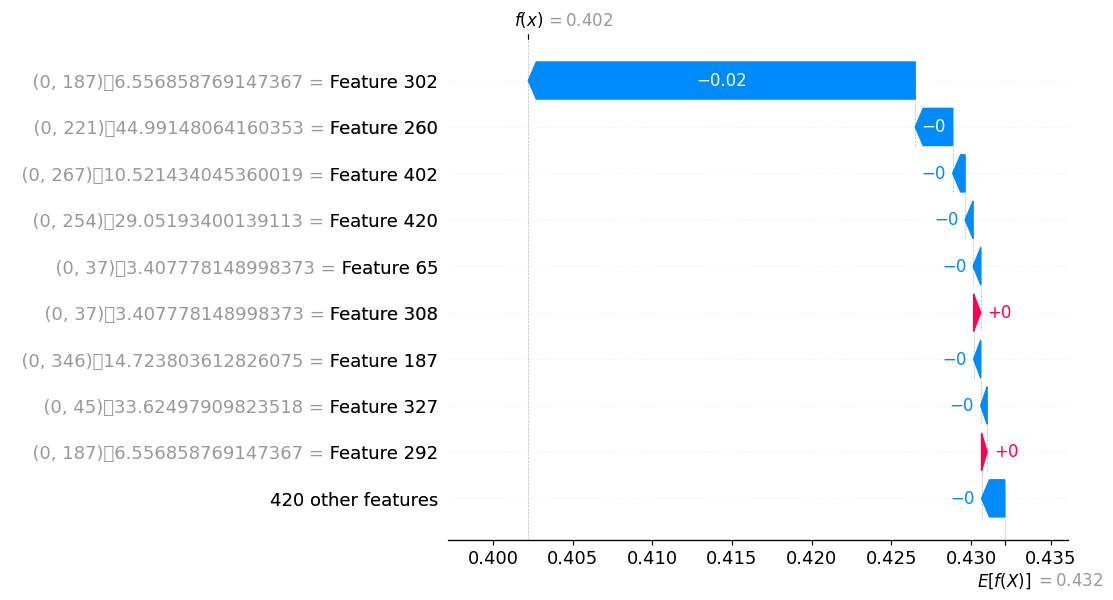

In [ ]:
import pandas as pd
import tensorflow as tf
import xgboost as xgb
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost.callback import EarlyStopping
from sklearn.preprocessing import StandardScaler
import numpy as np
import gc
import shap
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from xgboost.callback import EarlyStopping

# Load data and create features
df = pd.read_csv('/content/drive/MyDrive/CUNY/Capstone/Data/temp/tage_df.csv')
# One-hot encode the 'category_tags' column
df_onehot = pd.get_dummies(df, columns=['category_tags'], drop_first=True)

# Split data into features (X) and target (y)
X = df_onehot.drop("Change_abs", axis=1)
y = df_onehot["Change_abs"]
y = np.log1p(y)  # Log transformation

# Convert X to a sparse matrix
X_sparse = csr_matrix(X)

# Standardization of features (compatible with sparse matrices)
scaler = StandardScaler(with_mean=False)  # Exclude mean centering for sparse data
X_scaled = scaler.fit_transform(X_sparse)

# Visualize data and target distributions
# import matplotlib.pyplot as plt
# X.hist(figsize=(10, 8))  # Histograms for features
# plt.show()
# plt.scatter(X, y)  # Scatter plot for feature-target relationship
# plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Set up TPU (if available)
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    tpu_strategy = tf.distribute.TPUStrategy(tpu)
    print("TPU is activated.")
except ValueError:
    tpu = None
    tpu_strategy = tf.distribute.get_strategy()  # Use default strategy
    print("TPU is not actived.")



with tpu_strategy.scope():


    # Create the XGBoost model
    model = xgb.XGBRegressor(
            reg_lambda=1,  # Adjust regularization strength
            booster="gbtree",  # Use tree-based model
            n_estimators = 100,
            # device = 'gpu',
            )


    # Define hyperparameter grid for RandomizedSearchCV
    param_grid = {
        'eta': [0.01, 0.1,  0.2],
        'gamma': [0, 1, 2, 5, 10],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5, 7],
        'subsample': [0.7, 0.9, 1.0, 1.5, 2.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'lambda': [0, 0.1, 1, 10, 100],
        'alpha': [0, 0.1, 1, 10, 100],
        'tree_method': ['auto'],
        'n_estimators': [20, 50, 100]
    }

    # Cross-validation for hyperparameter tuning
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    randomized_search_cv = RandomizedSearchCV(model, param_grid, cv=kf, verbose=3)
    gc.collect()
    randomized_search_cv.fit(X_train, y_train)
    gc.collect()
    best_params = randomized_search_cv.best_params_  # Access best parameters

    # Train the final model using the best_params
    model.set_params(**best_params)  # Set hyperparameters to best_params

    # model.fit(X, y)
    model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train)],  # Provide a validation set for early stopping
        early_stopping_rounds=10,
        eval_metric='mae'  # Using MAE as the evaluation metric
    )



    # Evaluate performance
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)

    # Explain model predictions using SHAP
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)
    shap.plots.waterfall(shap_values[0])  # Explore other SHAP visualizations


# Get Tage Importance

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00774571
 0.         0.         0.01362391 0.01050679 0.         0.
 0.         0.         0.         0.         0.         0.01501439
 0.         0.01035356 0.         0.01313382 0.         0.
 0.         0.         0.         0.         0.         0.
 0.01690236 0.01912876 0.         0.01020127 0.00987078 0.
 0.         0.         0.         0.         0.         0.01657481
 0.         0.01183545 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01057005 0.
 0.         0.01364954 0.       

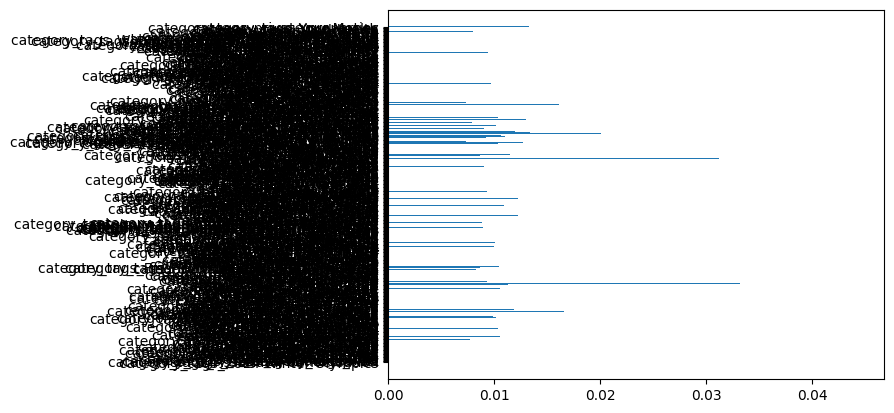

category_tags_WSJ News Exclusive: 0.0446026548743248
category_tags_Election2020: 0.03324536606669426
category_tags_Opinion: 0.03119851090013981
category_tags_Pro VC Snapshot: 0.030214253813028336
category_tags_Health: 0.020413847640156746
category_tags_Finance: 0.02029602974653244
category_tags_Pro PE Deals: 0.020065998658537865
category_tags_Financial Regulation: 0.019369307905435562
category_tags_CentralBanks: 0.01912875659763813
category_tags_Pro VC New Money: 0.01853574439883232
category_tags_Central Banks: 0.01690235547721386
category_tags_Commentary: 0.016574811190366745
category_tags_Risk & Compliance Journal: 0.016076689586043358
category_tags_Review&Outlook: 0.016002273187041283
category_tags_U.S.Economy: 0.01589267887175083
category_tags_Journal Reports: Funds/ETFs: 0.015689823776483536
category_tags_Logistics Report: 0.015261435881257057
category_tags_CFO Journal: 0.015014388598501682
category_tags_Election 2020: 0.013649539090692997
category_tags_Books: 0.013623913750052452

In [ ]:
importances = model.feature_importances_
print(importances)  # Print list of importance scores

import matplotlib.pyplot as plt
plt.barh(X.columns, importances)  # Horizontal bar plot
plt.show()

import numpy as np

# Assuming you have a list of column names from your dataset
column_names = X.columns.tolist()   # replace with your actual column names

# Pair the importances with the column names
feature_importance_pairs = list(zip(column_names, importances))

# Sort the pairs by importance score in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print or display the sorted feature importances
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance}")

## Save the tage Importance

In [ ]:
import pandas as pd

# Sort the pairs by importance score in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Convert the sorted pairs to a DataFrame
df_feature_importance = pd.DataFrame(sorted_feature_importance_pairs, columns=['Feature', 'Importance'])

# Save the DataFrame to a CSV file
df_feature_importance.to_csv('feature_importance.csv', index=False)

print("Feature importance saved to feature_importance.csv")


Feature importance saved to feature_importance.csv


#OLS Report

In [ ]:
from sklearn.metrics import mean_squared_error

y_true = y_test  # True values
y_pred = model.predict(X_test)  # Predicted values



import numpy as np
import statsmodels.api as sm
X_test_dense = X_test.toarray()  # Convert csr_matrix to a dense numpy array

model_OLS = sm.OLS(y_true.values, X_test_dense)
results = model_OLS.fit()
print(results.summary())

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_true and y_pred are numpy arrays or lists
y_true = np.array(y_true)
y_pred = np.array(y_pred)

mse = mean_squared_error(y_true, y_pred)
print("MSE:", mse)

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_true, y_pred)
print("R-squared:", r2)





                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.605
Model:                            OLS   Adj. R-squared (uncentered):              0.604
Method:                 Least Squares   F-statistic:                              482.6
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                        0.00
Time:                        03:58:05   Log-Likelihood:                         -50462.
No. Observations:              135557   AIC:                                  1.018e+05
Df Residuals:                  135128   BIC:                                  1.060e+05
Df Model:                         429                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Save OLS Report

In [ ]:
import re

# Extracting the relevant part of the summary
summary_text = results.summary().as_text()

# Using regular expressions to find the relevant section
pattern = re.compile(r'OLS Regression Results.*?Df Model:', re.DOTALL)
match = pattern.search(summary_text)

if match:
    desired_summary = match.group(0)

    # Saving the summary to a CSV file
    with open('ols_summary.csv', 'w') as file:
        file.write(desired_summary)
else:
    print("The relevant section was not found in the summary.")


In [ ]:
import pandas as pd

# Saving OLS results to CSV
summary_df = pd.DataFrame(results.summary().tables[1].data[1:], columns=results.summary().tables[1].data[0])
summary_df.to_csv('ols_results_summary.csv', index=False)

In [ ]:
summary_test = pd.read_csv('/content/ols_results_summary.csv')
summary_test

,Unnamed: 0,coef,std err,t,P>|t|,[0.025,0.975]
0,x1,0.0046,0.001,4.992,0.0,0.003,0.006
1,x2,0.0043,0.001,5.100,0.0,0.003,0.006
2,x3,0.0055,0.001,6.036,0.0,0.004,0.007
3,x4,0.0051,0.001,5.246,0.0,0.003,0.007
4,x5,0.0043,0.001,3.855,0.0,0.002,0.006
...,...,...,...,...,...,...,...
424,x425,0.0064,0.001,6.775,0.0,0.005,0.008
425,x426,0.0068,0.001,6.785,0.0,0.005,0.009
426,x427,0.0094,0.001,8.641,0.0,0.007,0.012
427,x428,0.0079,0.001,7.789,0.0,0.006,0.010


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_true and y_pred are numpy arrays or lists
y_true = np.array(y_true)
y_pred = np.array(y_pred)

mse = mean_squared_error(y_true, y_pred)
print("MSE:", mse)

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_true, y_pred)
print("R-squared:", r2)


MSE: 0.12473528329990209
MAE: 0.2778436254322578
RMSE: 0.3531788262338246
R-squared: 0.0036278085543527405


## Save the XGB Model

In [ ]:
import joblib

# Save the trained model to a file
model_filename = "/content/drive/MyDrive/CUNY/Capstone/Data/model/assign_label_weights_XGB/assign_label_weights_XGB.dat"
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to /content/drive/MyDrive/CUNY/Capstone/Data/model/assign_label_weights_XGB/assign_label_weights_XGB.dat


In [ ]:
# Load the trained model from the file
loaded_model = joblib.load(model_filename)

In [ ]:
from sklearn.metrics import mean_squared_error

y_true = y_test  # True values
y_pred = model.predict(X_test)  # Predicted values



import numpy as np
import statsmodels.api as sm
X_test_dense = X_test.toarray()  # Convert csr_matrix to a dense numpy array

model_OLS = sm.OLS(y_true.values, X_test_dense)
results = model_OLS.fit()
print(results.summary())

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_true and y_pred are numpy arrays or lists
y_true = np.array(y_true)
y_pred = np.array(y_pred)

mse = mean_squared_error(y_true, y_pred)
print("MSE:", mse)

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)

# Calculate R-squared
r2 = r2_score(y_true, y_pred)
print("R-squared:", r2)





                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.605
Model:                            OLS   Adj. R-squared (uncentered):              0.604
Method:                 Least Squares   F-statistic:                              482.6
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                        0.00
Time:                        05:14:40   Log-Likelihood:                         -50462.
No. Observations:              135557   AIC:                                  1.018e+05
Df Residuals:                  135128   BIC:                                  1.060e+05
Df Model:                         429                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [2]:
# ! pip list

Package                          Version
-------------------------------- ---------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
bigfram